In [48]:
import bs4 as bs
import urllib.request
import numpy as np
import pandas as pd
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
sauce = urllib.request.urlopen('https://www.imdb.com/name/nm0027572/').read()
soup = bs.BeautifulSoup(sauce, 'lxml')

In [3]:
div_list = []
for div in soup.find_all('div', class_ = "filmo-category-section"):
    div_list.append(div)

In [4]:
director = div_list[1]

In [5]:
directed_titles = []
for div in director.find_all('div'):
    directed_titles.append(div.b.a.text)
directed_titles = np.array(directed_titles)
directed_titles

array(['The French Dispatch', 'Isle of Dogs',
       'Come Together: A Fashion Picture in Motion',
       'The Grand Budapest Hotel', 'Castello Cavalcanti', 'Prada: Candy',
       'Cousin Ben Troop Screening with Jason Schwartzman',
       'Moonrise Kingdom: Animated Book Short', 'Moonrise Kingdom',
       'Fantastic Mr. Fox', 'Hotel Chevalier', 'The Darjeeling Limited',
       'American Express: My Life. My Card.',
       'The Life Aquatic with Steve Zissou', 'The Royal Tenenbaums',
       'Rushmore', 'Bottle Rocket', 'Bottle Rocket'], dtype='<U49')

In [6]:
directed_urls = []
base_url = 'https://www.imdb.com'
for div in director.find_all('div'):
    directed_urls.append(base_url + str(div.b.a.get('href')))
directed_urls = np.array(directed_urls)
directed_urls

array(['https://www.imdb.com/title/tt8847712/?ref_=nm_flmg_dr_1',
       'https://www.imdb.com/title/tt5104604/?ref_=nm_flmg_dr_2',
       'https://www.imdb.com/title/tt6282412/?ref_=nm_flmg_dr_3',
       'https://www.imdb.com/title/tt2278388/?ref_=nm_flmg_dr_4',
       'https://www.imdb.com/title/tt3331512/?ref_=nm_flmg_dr_5',
       'https://www.imdb.com/title/tt2808968/?ref_=nm_flmg_dr_6',
       'https://www.imdb.com/title/tt2219564/?ref_=nm_flmg_dr_7',
       'https://www.imdb.com/title/tt3707014/?ref_=nm_flmg_dr_8',
       'https://www.imdb.com/title/tt1748122/?ref_=nm_flmg_dr_9',
       'https://www.imdb.com/title/tt0432283/?ref_=nm_flmg_dr_10',
       'https://www.imdb.com/title/tt1094249/?ref_=nm_flmg_dr_11',
       'https://www.imdb.com/title/tt0838221/?ref_=nm_flmg_dr_12',
       'https://www.imdb.com/title/tt4283584/?ref_=nm_flmg_dr_13',
       'https://www.imdb.com/title/tt0362270/?ref_=nm_flmg_dr_14',
       'https://www.imdb.com/title/tt0265666/?ref_=nm_flmg_dr_15',
    

In [7]:
# remove short and unreleased films
directed_feature_titles = np.delete(directed_titles, (0,2,4,5,6,7,10,12,17))
directed_feature_titles

array(['Isle of Dogs', 'The Grand Budapest Hotel', 'Moonrise Kingdom',
       'Fantastic Mr. Fox', 'The Darjeeling Limited',
       'The Life Aquatic with Steve Zissou', 'The Royal Tenenbaums',
       'Rushmore', 'Bottle Rocket'], dtype='<U49')

In [8]:
# remove short and unreleased films
directed_feature_urls = np.delete(directed_urls, (0,2,4,5,6,7,10,12,17))
directed_feature_urls

array(['https://www.imdb.com/title/tt5104604/?ref_=nm_flmg_dr_2',
       'https://www.imdb.com/title/tt2278388/?ref_=nm_flmg_dr_4',
       'https://www.imdb.com/title/tt1748122/?ref_=nm_flmg_dr_9',
       'https://www.imdb.com/title/tt0432283/?ref_=nm_flmg_dr_10',
       'https://www.imdb.com/title/tt0838221/?ref_=nm_flmg_dr_12',
       'https://www.imdb.com/title/tt0362270/?ref_=nm_flmg_dr_14',
       'https://www.imdb.com/title/tt0265666/?ref_=nm_flmg_dr_15',
       'https://www.imdb.com/title/tt0128445/?ref_=nm_flmg_dr_16',
       'https://www.imdb.com/title/tt0115734/?ref_=nm_flmg_dr_17'],
      dtype='<U56')

In [9]:
def get_cast(url, title):
    
    dfs = pd.read_html(url, header = 0)
    cast_table = dfs[0]
    cast_table = pd.DataFrame(cast_table.iloc[:,1])
    cast_table.columns = [title]
    
    return cast_table
    

In [10]:
def create_full_cast_table(url_list, title_list):
    
    df = get_cast(directed_feature_urls[0], directed_feature_titles[0])
    for i in range(1,len(url_list)):
        new_df = get_cast(url_list[i], title_list[i])
        df = df.join(new_df)
    return df

In [11]:
full_cast_table = create_full_cast_table(directed_feature_urls, directed_feature_titles)
full_cast_table

,Isle of Dogs,The Grand Budapest Hotel,Moonrise Kingdom,Fantastic Mr. Fox,The Darjeeling Limited,The Life Aquatic with Steve Zissou,The Royal Tenenbaums,Rushmore,Bottle Rocket
0,Bryan Cranston,Ralph Fiennes,Bruce Willis,George Clooney,Owen Wilson,Bill Murray,Gene Hackman,Jason Schwartzman,Luke Wilson
1,Koyu Rankin,F. Murray Abraham,Edward Norton,Meryl Streep,Adrien Brody,Owen Wilson,Anjelica Huston,Bill Murray,Owen Wilson
2,Edward Norton,Mathieu Amalric,Bill Murray,Jason Schwartzman,Jason Schwartzman,Cate Blanchett,Ben Stiller,Olivia Williams,Ned Dowd
3,Bob Balaban,Adrien Brody,Frances McDormand,Bill Murray,Amara Karan,Anjelica Huston,Gwyneth Paltrow,Seymour Cassel,Shea Fowler
4,Jeff Goldblum,Willem Dafoe,Tilda Swinton,Wallace Wolodarsky,Wallace Wolodarsky,Willem Dafoe,Luke Wilson,Brian Cox,Haley Miller
5,Bill Murray,Jeff Goldblum,Jared Gilman,Eric Chase Anderson,Waris Ahluwalia,Jeff Goldblum,Owen Wilson,Mason Gamble,Robert Musgrave
6,Kunichi Nomura,Harvey Keitel,Kara Hayward,Michael Gambon,Irrfan Khan,Michael Gambon,Bill Murray,Sara Tanaka,Andrew Wilson
7,Akira Takayama,Jude Law,Jason Schwartzman,Willem Dafoe,Barbet Schroeder,Noah Taylor,Danny Glover,Stephen McCole,Brian Tenenbaum
8,Greta Gerwig,Bill Murray,Bob Balaban,Owen Wilson,Camilla Rutherford,Bud Cort,Seymour Cassel,Connie Nielsen,Jenni Tooley
9,Frances McDormand,Edward Norton,Lucas Hedges,Jarvis Cocker,Bill Murray,Seu Jorge,Kumar Pallana,Luke Wilson,Temple Nash


In [12]:
full_cast_table.to_csv(r'wes_anderson_cast.csv')

In [46]:
data_dict = dict()
for i in range(9):
    movie = full_cast_table.columns[i]
    actors = list(full_cast_table.iloc[:,i])
    data_dict[movie] = actors
data_dict

{'Bottle Rocket': ['Luke Wilson',
  'Owen Wilson',
  'Ned Dowd',
  'Shea Fowler',
  'Haley Miller',
  'Robert Musgrave',
  'Andrew Wilson',
  'Brian Tenenbaum',
  'Jenni Tooley',
  'Temple Nash',
  'Dipak Pallana',
  'Darryl Cox',
  'Stephen Dignan',
  'Lumi Cavazos',
  'Julie Mayfield'],
 'Fantastic Mr. Fox': ['George Clooney',
  'Meryl Streep',
  'Jason Schwartzman',
  'Bill Murray',
  'Wallace Wolodarsky',
  'Eric Chase Anderson',
  'Michael Gambon',
  'Willem Dafoe',
  'Owen Wilson',
  'Jarvis Cocker',
  'Wes Anderson',
  'Karen Duffy',
  'Robin Hurlstone',
  'Hugo Guinness',
  'Helen McCrory'],
 'Isle of Dogs': ['Bryan Cranston',
  'Koyu Rankin',
  'Edward Norton',
  'Bob Balaban',
  'Jeff Goldblum',
  'Bill Murray',
  'Kunichi Nomura',
  'Akira Takayama',
  'Greta Gerwig',
  'Frances McDormand',
  'Akira Ito',
  'Scarlett Johansson',
  'Harvey Keitel',
  'F. Murray Abraham',
  'Yoko Ono'],
 'Moonrise Kingdom': ['Bruce Willis',
  'Edward Norton',
  'Bill Murray',
  'Frances McDorm

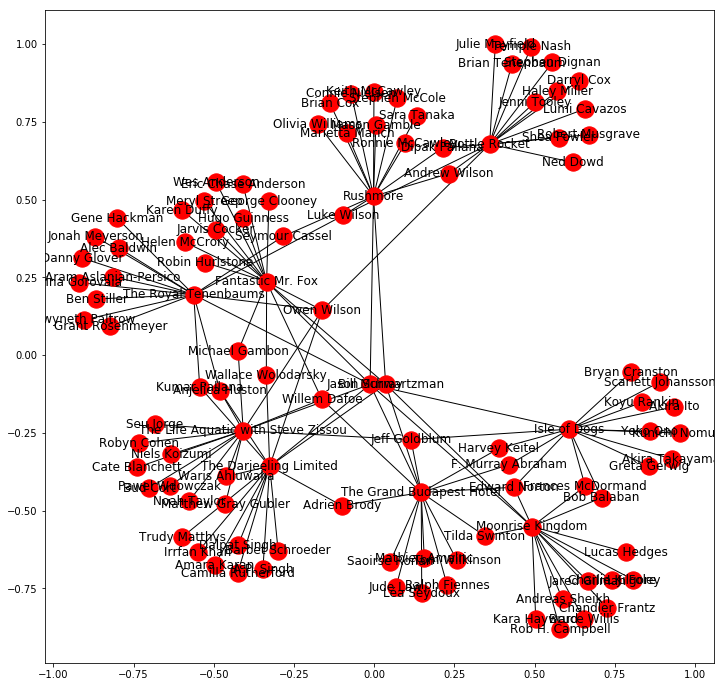

In [57]:
G = nx.Graph(data_dict)
plt.figure(3,figsize=(12,12)) 
nx.draw_networkx(G)
plt.show()


In [62]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 106
Number of edges: 135
Average degree:   2.5472


(-1.0975486217513986,
 0.9131298199123821,
 -0.8287443233474876,
 0.8051148462362172)

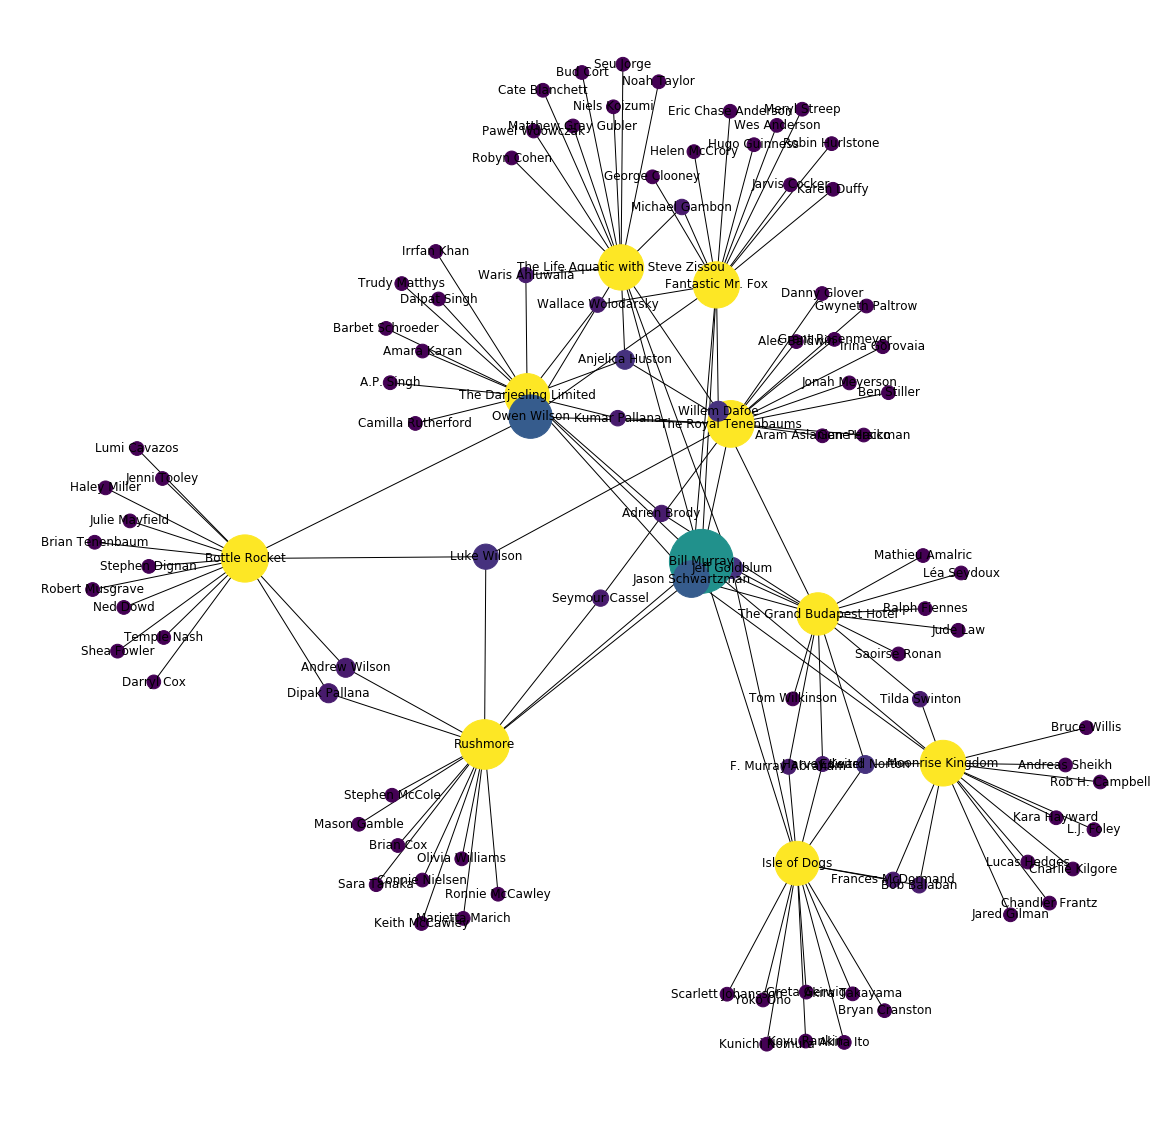

In [68]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [67]:
sorted(betCent, key=betCent.get, reverse=True)[:20]

['Bill Murray',
 'Rushmore',
 'Bottle Rocket',
 'The Royal Tenenbaums',
 'Fantastic Mr. Fox',
 'Moonrise Kingdom',
 'The Life Aquatic with Steve Zissou',
 'The Darjeeling Limited',
 'Isle of Dogs',
 'Owen Wilson',
 'The Grand Budapest Hotel',
 'Jason Schwartzman',
 'Luke Wilson',
 'Jeff Goldblum',
 'Willem Dafoe',
 'Anjelica Huston',
 'Dipak Pallana',
 'Andrew Wilson',
 'Edward Norton',
 'Seymour Cassel']